<a href="https://colab.research.google.com/github/seshadrite/aimlexercises/blob/main/exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load the CSV file from GitHub
import pandas as pd
import requests
import io
github_csv_url = "https://raw.githubusercontent.com/seshadrite/aimlexercises/main/exercise1.csv"
try:
    response = requests.get(github_csv_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    # Read the content into a pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))

    print("CSV loaded successfully!")
    print(df.head())
except requests.exceptions.RequestException as e:
    print(f"Error fetching the CSV file: {e}")
    print("Please ensure the URL is correct and accessible.")
except pd.errors.EmptyDataError:
    print("Error: No data to parse. The CSV file might be empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

CSV loaded successfully!
   Experience (yrs)  Training Hours  Working Hours  Projects  \
0                 2              40             38         3   
1                 5              60             42         6   
2                 1              20             35         2   
3                 8              80             45         8   
4                 4              50             40         5   

   Productivity Score  
0                  62  
1                  78  
2                  55  
3                  88  
4                  72  


In [7]:
# •	Which factor most strongly impacts productivity?

correlation_matrix = df.corr()
productivity_correlations = correlation_matrix['Productivity Score']

# Drop self-correlation
productivity_correlations = productivity_correlations.drop('Productivity Score')

# Get column with highest correlation
max_feature = productivity_correlations.idxmax()
max_value = productivity_correlations.max()

print(f"Highest correlated feature: {max_feature}")
print(f"Correlation value: {max_value}")

Highest correlated feature: Projects
Correlation value: 0.9956956788596761


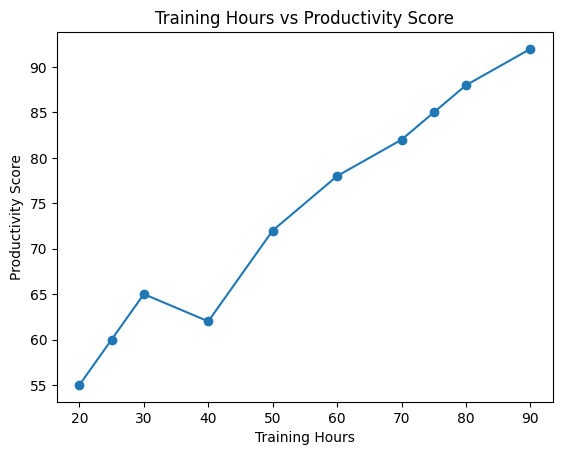

In [11]:
#	How does training affect productivity?
import matplotlib.pyplot as plt

training_hours_sorted, productivity_sorted = zip(
    *sorted(zip(df['Training Hours'], df['Productivity Score']))
)
# Plot line graph
plt.figure()
plt.plot(training_hours_sorted, productivity_sorted, marker='o')
plt.xlabel("Training Hours")
plt.ylabel("Productivity Score")
plt.title("Training Hours vs Productivity Score")
plt.show()

# As per the plot Training has a positive correlation with producitivity overall, except for the duration between 30-40.





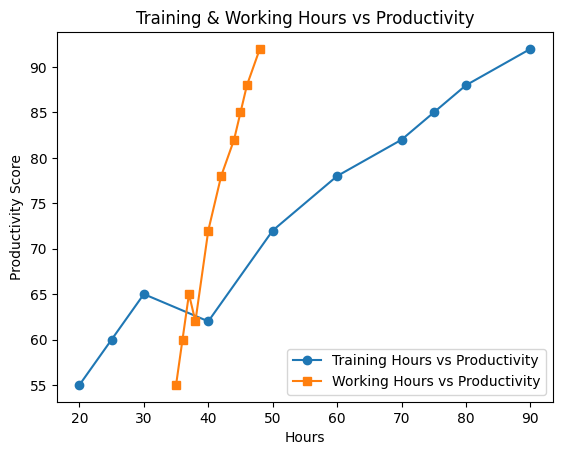

Correlation Matrix:

                    Experience (yrs)  Training Hours  Working Hours  Projects  \
Experience (yrs)            1.000000        0.969810       0.973178  0.988194   
Training Hours              0.969810        1.000000       0.993132  0.977151   
Working Hours               0.973178        0.993132       1.000000  0.974701   
Projects                    0.988194        0.977151       0.974701  1.000000   
Productivity Score          0.981991        0.987045       0.985684  0.995696   

                    Productivity Score  
Experience (yrs)              0.981991  
Training Hours                0.987045  
Working Hours                 0.985684  
Projects                      0.995696  
Productivity Score            1.000000  




In [21]:
#	Should the company increase training hours or working hours?

# Sort data by productivity for smoother comparison
training_sorted, productivity_sorted = zip(*sorted(zip(df['Training Hours'], df['Productivity Score'])))
working_sorted, _ = zip(*sorted(zip(df['Working Hours'], df['Productivity Score'])))

# Plot
plt.figure()
plt.plot(training_sorted, productivity_sorted, marker='o', label='Training Hours vs Productivity')
plt.plot(working_sorted, productivity_sorted, marker='s', label='Working Hours vs Productivity')

plt.xlabel("Hours")
plt.ylabel("Productivity Score")
plt.title("Training & Working Hours vs Productivity")
plt.legend()
plt.show()

# -----------------------------
# 1. Correlation analysis
# -----------------------------
print("Correlation Matrix:\n")
print(df.corr())
print("\n")

#	Answer : Given the high colinearity between Training and Working Hours, and Training Hours has high influence over Producitivity, Training hours can be increased.



Correlation Matrix:

                    Experience (yrs)  Training Hours  Working Hours  Projects  \
Experience (yrs)            1.000000        0.969810       0.973178  0.988194   
Training Hours              0.969810        1.000000       0.993132  0.977151   
Working Hours               0.973178        0.993132       1.000000  0.974701   
Projects                    0.988194        0.977151       0.974701  1.000000   
Productivity Score          0.981991        0.987045       0.985684  0.995696   

                    Productivity Score  
Experience (yrs)              0.981991  
Training Hours                0.987045  
Working Hours                 0.985684  
Projects                      0.995696  
Productivity Score            1.000000  


